In [ ]:
import pandas as pd

In [ ]:
House_data = pd.read_csv('HousingPricesData.csv')

Loading House Price data into House_data dataframe

In [ ]:
House_data.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [ ]:
House_data.shape

(924, 8)

Shows columns and rows of our dataframe

Selecting specific columns

In [ ]:
Selected_data = House_data[['Zip', 'Price', 'Area', 'Room']]


## Creating Price Per Sqft column and finding price per area in each

In [ ]:
Selected_data['PricePerSqft']= Selected_data['Price']/Selected_data['Area']

/tmp/ipython-input-3278782370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selected_data['PricePerSqft']= Selected_data['Price']/Selected_data['Area']


In [ ]:
Selected_data['PricePerSqft'].head()

,PricePerSqft
0,10703.125000
1,7916.666667
2,7798.165138
3,4531.250000
4,5217.391304


##Sorting Prices in desending order

In [ ]:
Selected_data = Selected_data.sort_values('Price', ascending = False)


## Visualizing Zip and Price (First 10)

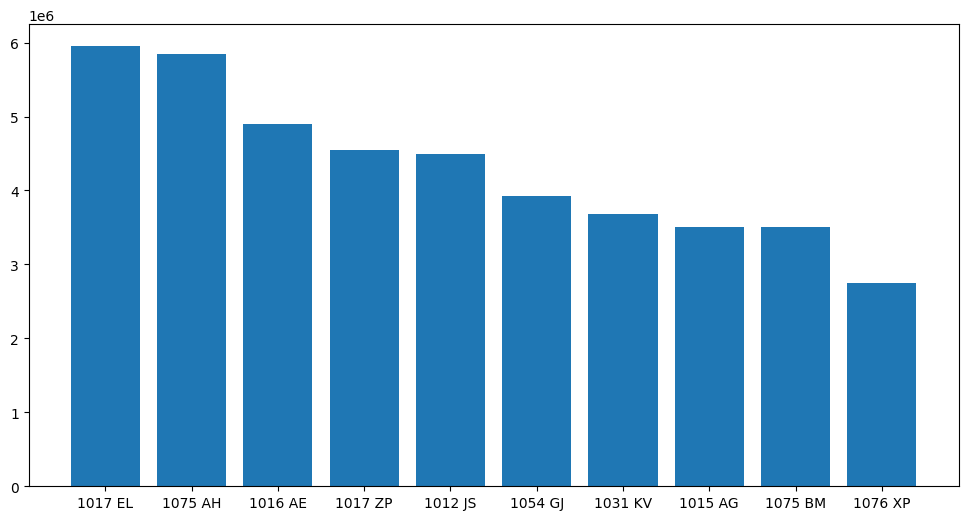

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (12,6))
x = Selected_data['Zip'][0:10]
y = Selected_data['Price'][0:10]
plt.bar(x,y)
plt.show()

The resulting bar chart shows the house prices for the top 10 areas (based on the previously sorted data by price). Each bar represents a zip code, and the height of the bar indicates the corresponding house price. You can see which zip codes have the highest house prices among the top 10.

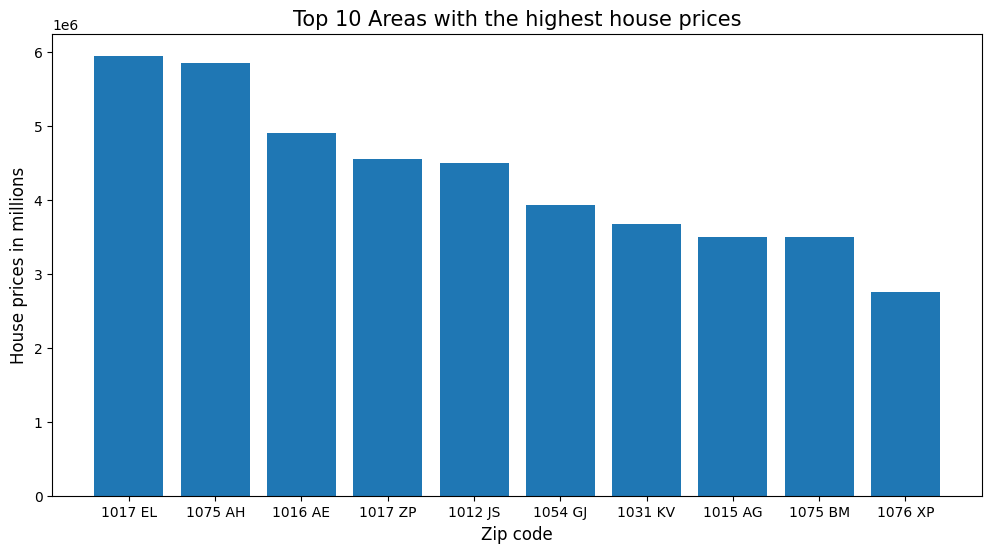

In [ ]:
plt.figure(figsize= (12,6))
plt.bar(x,y)
plt.title('Top 10 Areas with the highest house prices', fontsize=15)
plt.xlabel('Zip code', fontsize = 12)
plt.xticks(fontsize=10)
plt.ylabel('House prices in millions', fontsize=12)
plt.yticks(fontsize=10)
plt.show()

Adds a title and labels to the x and y axes for better readability. `plt.figure(figsize=(12,6))` sets the size of the plot.

## Visualizing First 10 Price and zip also vizualizing ip and price per sq in second figure

Text(0.5, 1.0, 'Top 10 Areas with the highest house prices per sqm')

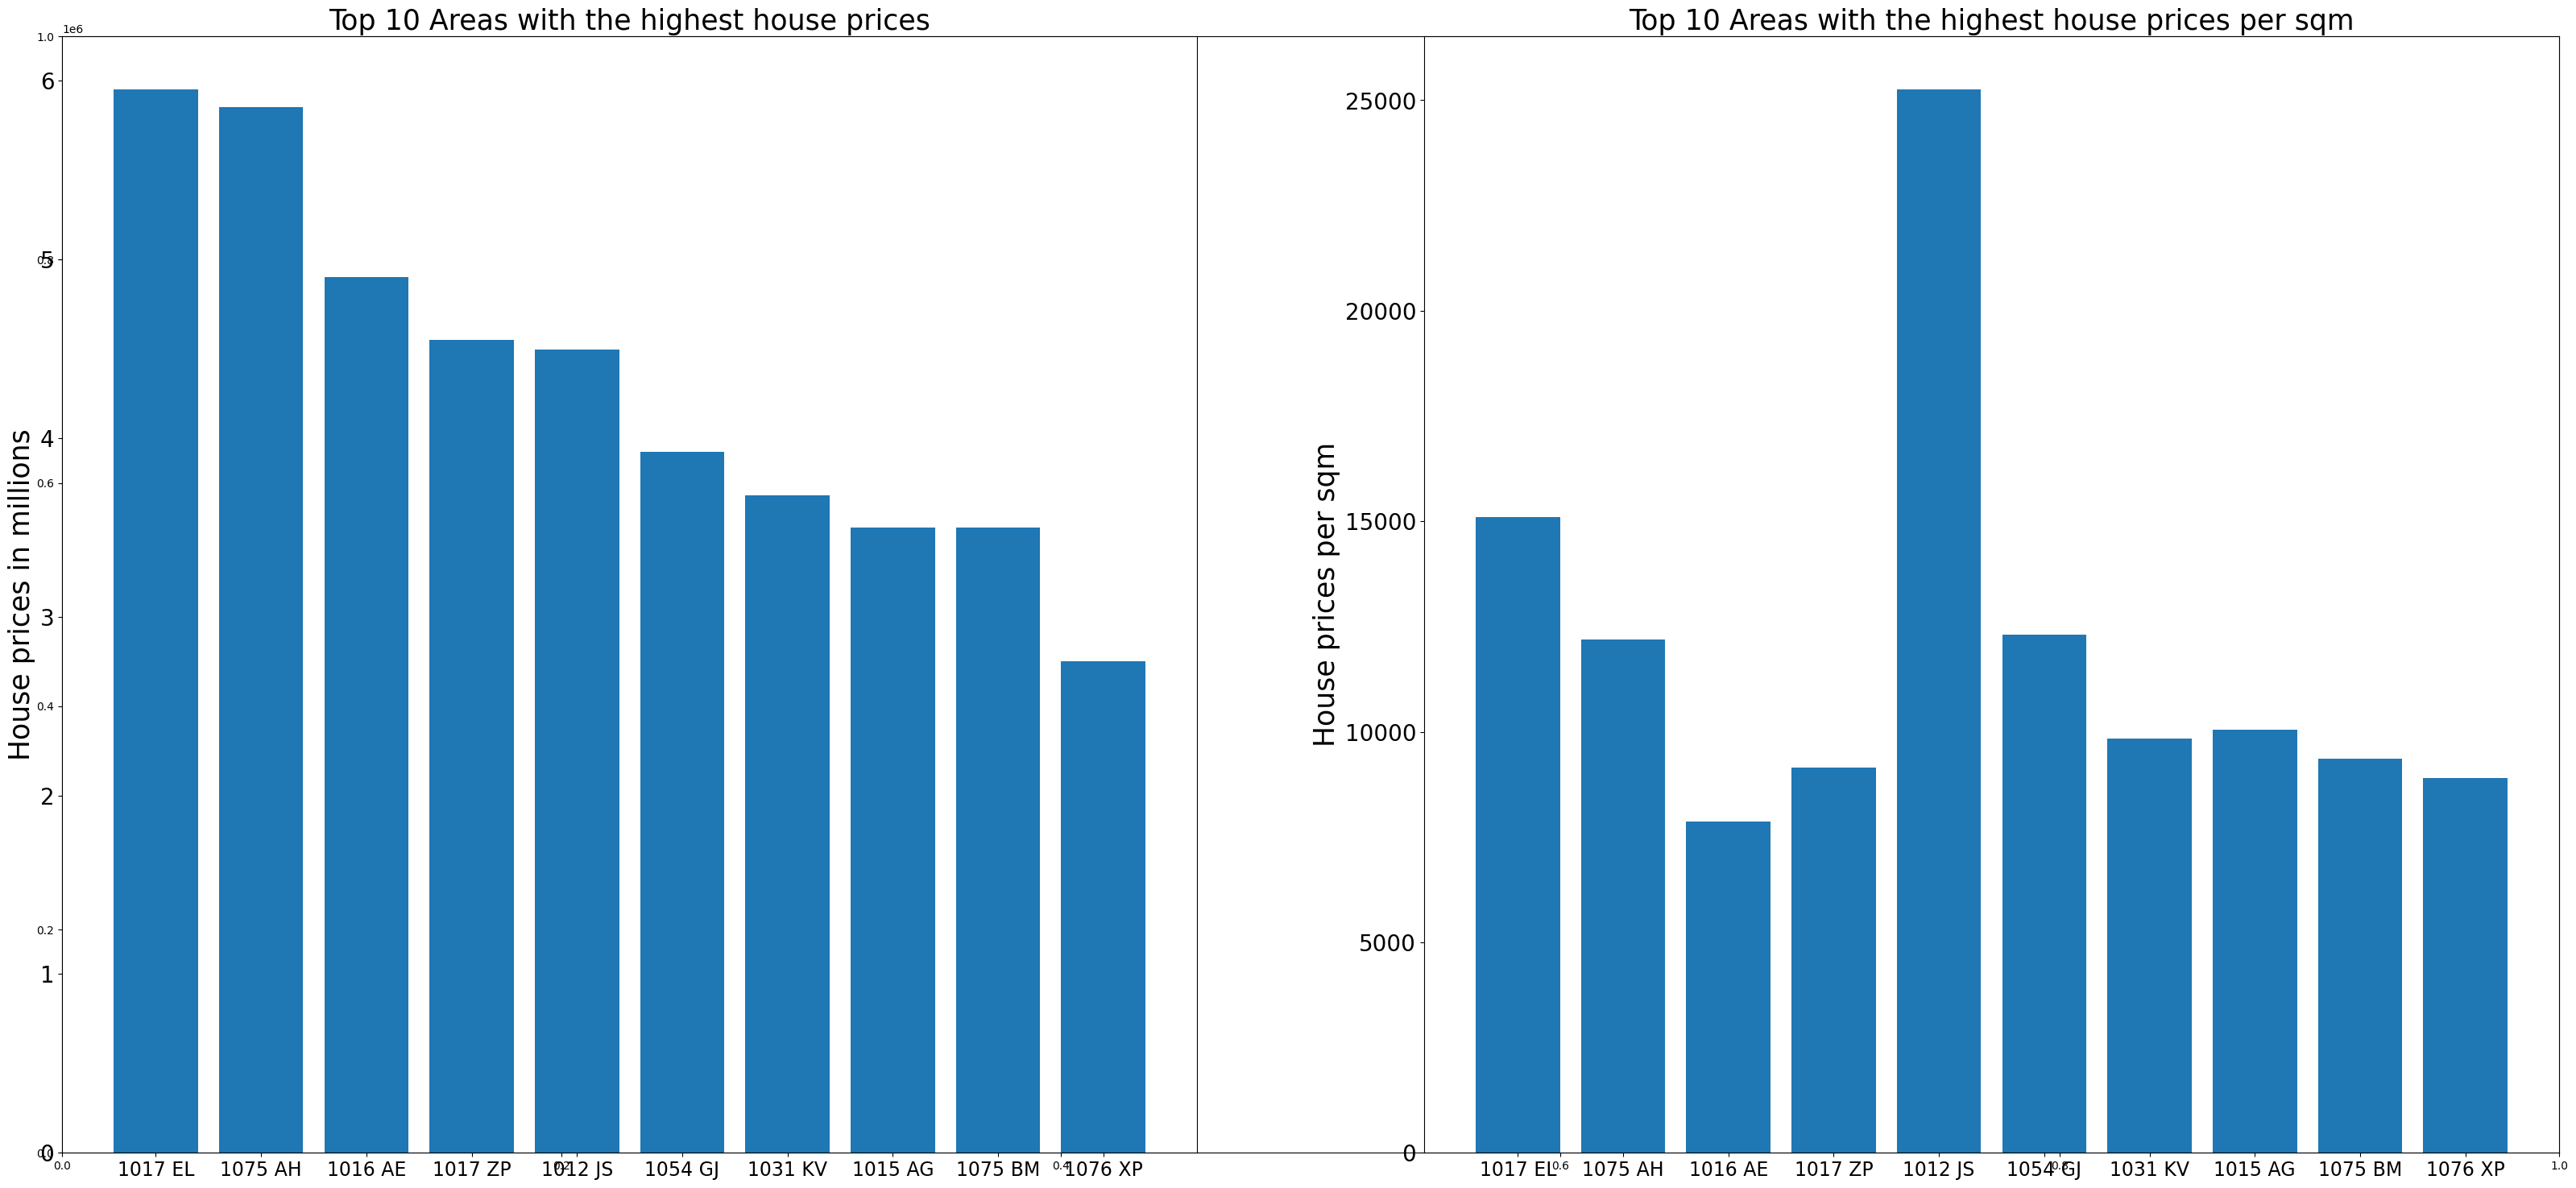

In [ ]:
fig, ax = plt.subplots(figsize=(40,18))

x = Selected_data['Zip'][0:10]
y = Selected_data['Price'][0:10]
y1 = Selected_data['PricePerSqft'][0:10]

plt.subplot(1,2,1)
plt.bar(x,y)
plt.xticks(fontsize=17)
plt.ylabel('House prices in millions', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest house prices', fontsize=25)

plt.subplot(1,2,2)
plt.bar(x,y1)
plt.xticks(fontsize=17)
plt.ylabel('House prices per sqm', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest house prices per sqm', fontsize=25)

The output shows two bar charts:

The first chart on the left displays the top 10 highest house prices by zip code.
The second chart on the right displays the top 10 highest house prices per square meter by zip code.
Comparing the two plots, you can see that the zip code with the highest house price isn't necessarily the one with the highest price per square meter. This highlights the difference between overall price and price efficiency based on area.



## Now Using Seaborn library to visualize Price and Zip

<Axes: xlabel='Zip', ylabel='Price'>

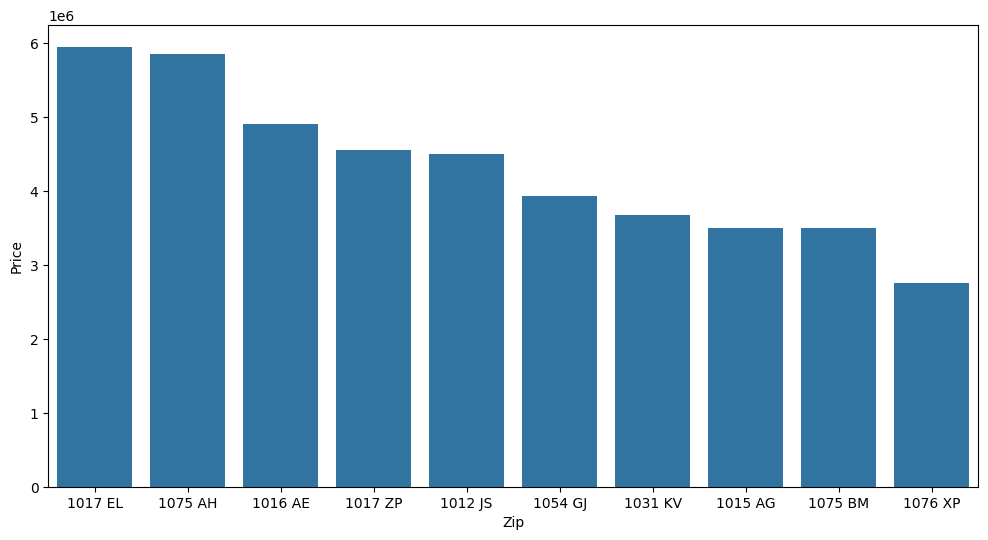

In [ ]:
import seaborn as sns
plt.figure(figsize= (12,6))
sns.barplot(data= Selected_data[0:10], x= 'Zip',y = 'Price')

The resulting bar chart, similar to the one created with pure Matplotlib, shows the house prices for the top 10 areas (by price). Each bar represents a zip code, and its height corresponds to the house price. Seaborn often provides more aesthetically pleasing default styles compared to Matplotlib.

## Adding X and y labels and title to make it more readable

Text(0.5, 1.0, 'Top 10 Areas with the highest house prices')

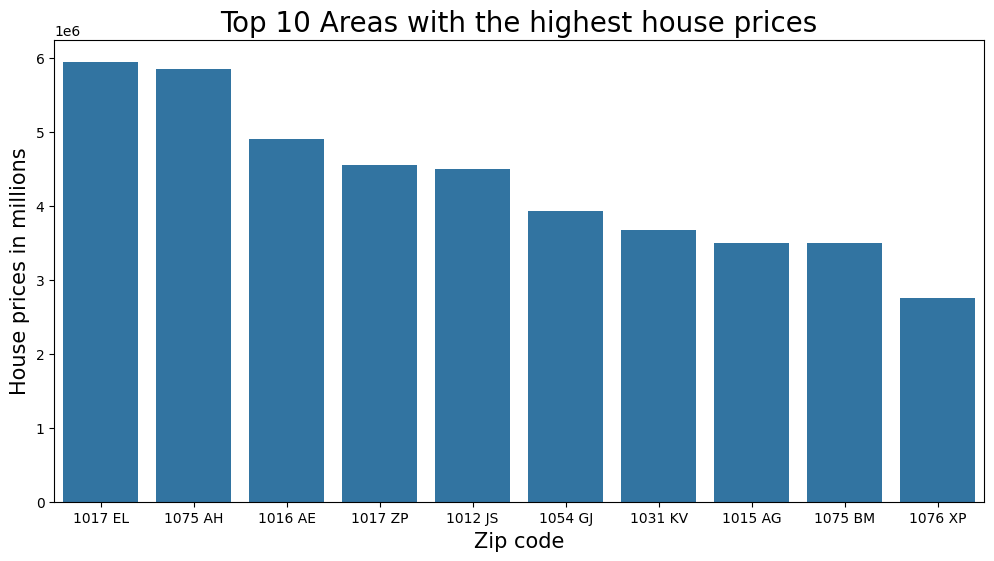

In [ ]:
plt.figure(figsize= (12,6))
data = Selected_data[0:10]

ax = sns.barplot(data= data, x= 'Zip',y = 'Price')
ax.set_xlabel('Zip code',fontsize = 15)
ax.set_ylabel('House prices in millions', fontsize = 15)
ax.set_title('Top 10 Areas with the highest house prices', fontsize= 20)

Adds Title and x and y Labels to make chart more readable

## Using same Figure but this time adding labels through metplotlib

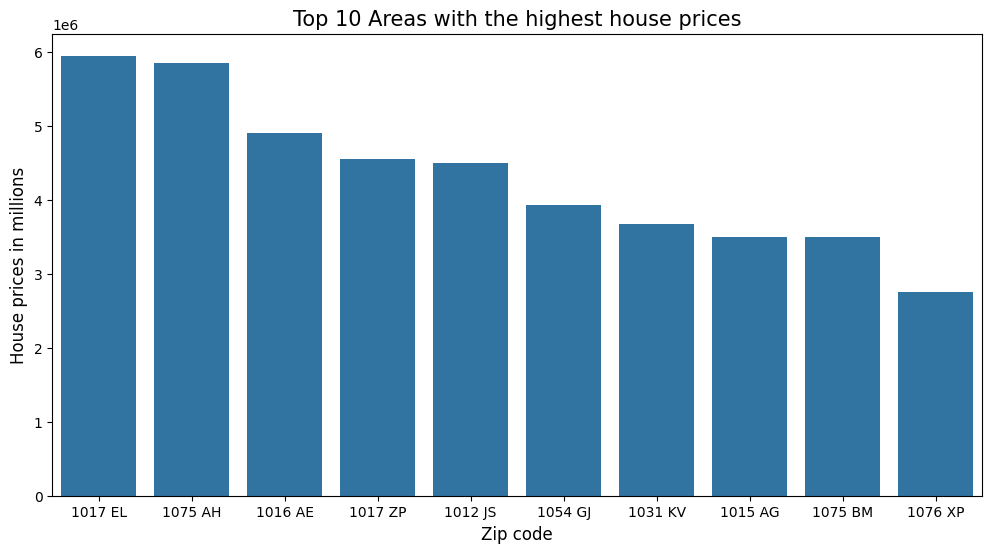

In [ ]:
plt.figure(figsize= (12,6))
sns.barplot(data= data, x= 'Zip',y = 'Price')
plt.title('Top 10 Areas with the highest house prices', fontsize=15)
plt.xlabel('Zip code', fontsize = 12)
plt.xticks(fontsize=10)
plt.ylabel('House prices in millions', fontsize=12)
plt.yticks(fontsize=10)
plt.show()

Shows the house prices for the top 10 areas (by price). Each bar represents a zip code, and its height corresponds to the house price.



## Creating Subplots using matplotlib and craeting figure through seaborn library

Text(0.5, 1.0, 'Top 10 Areas with the highest price per sqm')

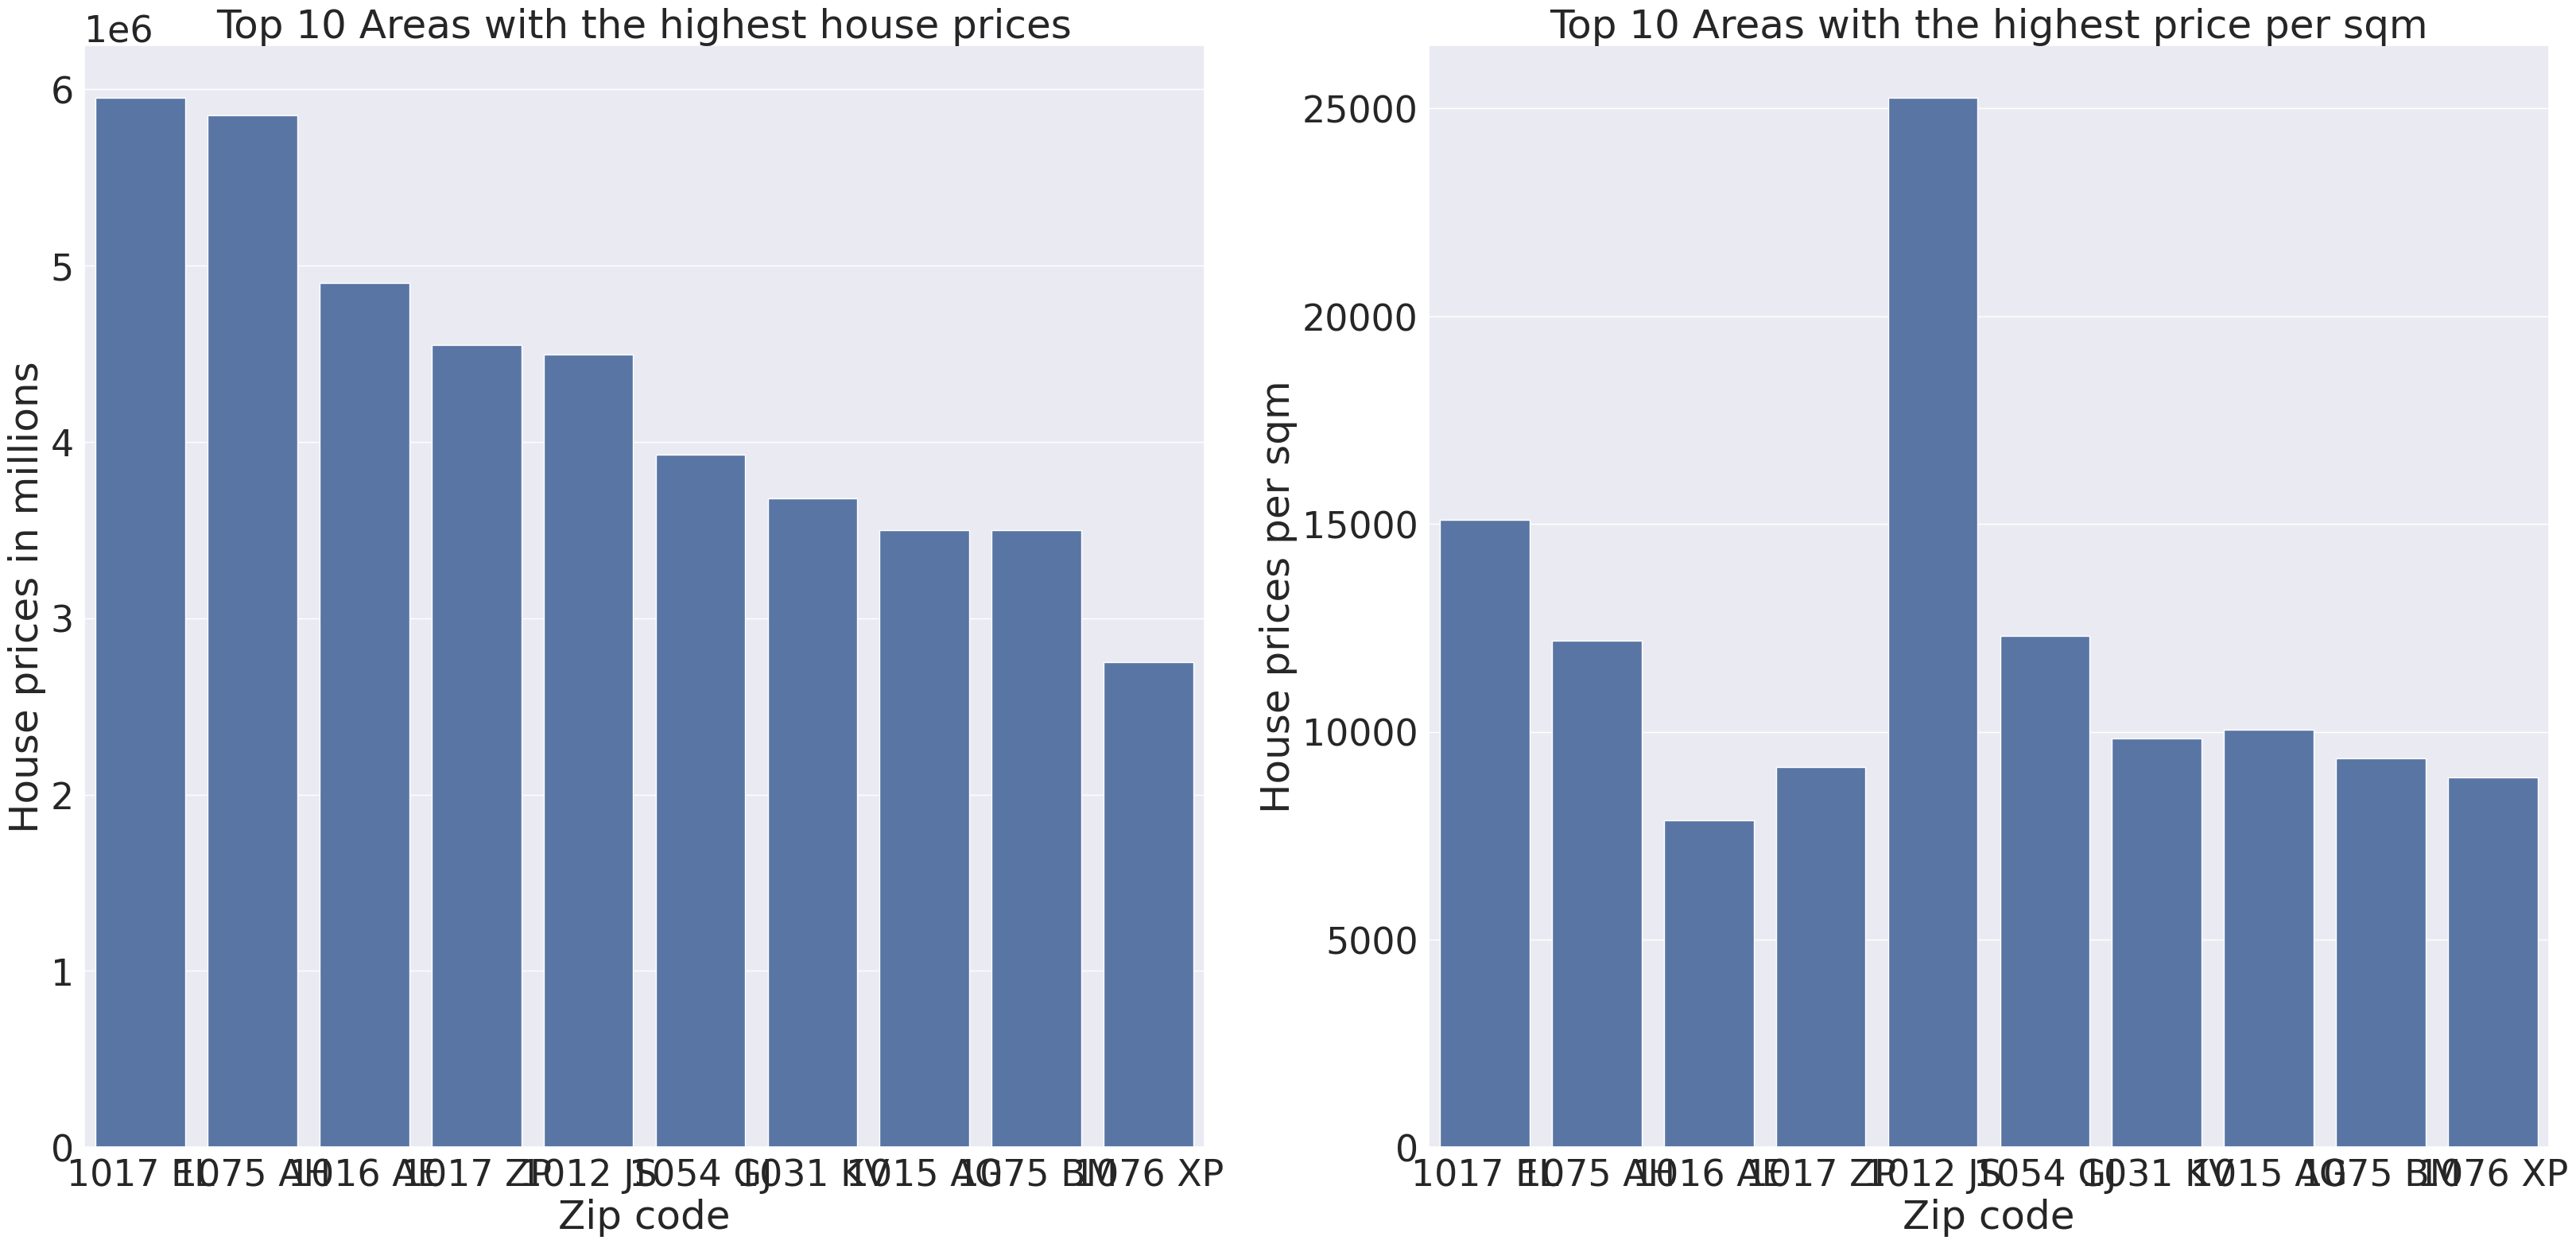

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(40,18))

data = Selected_data[0:10]

sns.set(font_scale = 3)
ax1 = sns.barplot(data= data, x= 'Zip',y = 'Price', ax = ax[0])
ax1.set_xlabel('Zip code')
ax1.set_ylabel('House prices in millions')
ax1.set_title('Top 10 Areas with the highest house prices')


ax2 = sns.barplot(data= data, x= 'Zip',y = 'PricePerSqft', ax=ax[1])
ax2.set_xlabel('Zip code')
ax2.set_ylabel('House prices per sqm')
ax2.set_title('Top 10 Areas with the highest price per sqm')

Similar to the previous example with Matplotlib subplots, this visualization allows you to compare the overall house price in an area with the price per unit of area, highlighting potential differences in value even among the most expensive locations.

## Plotting using GGPLOT

In [ ]:
from plotnine import *


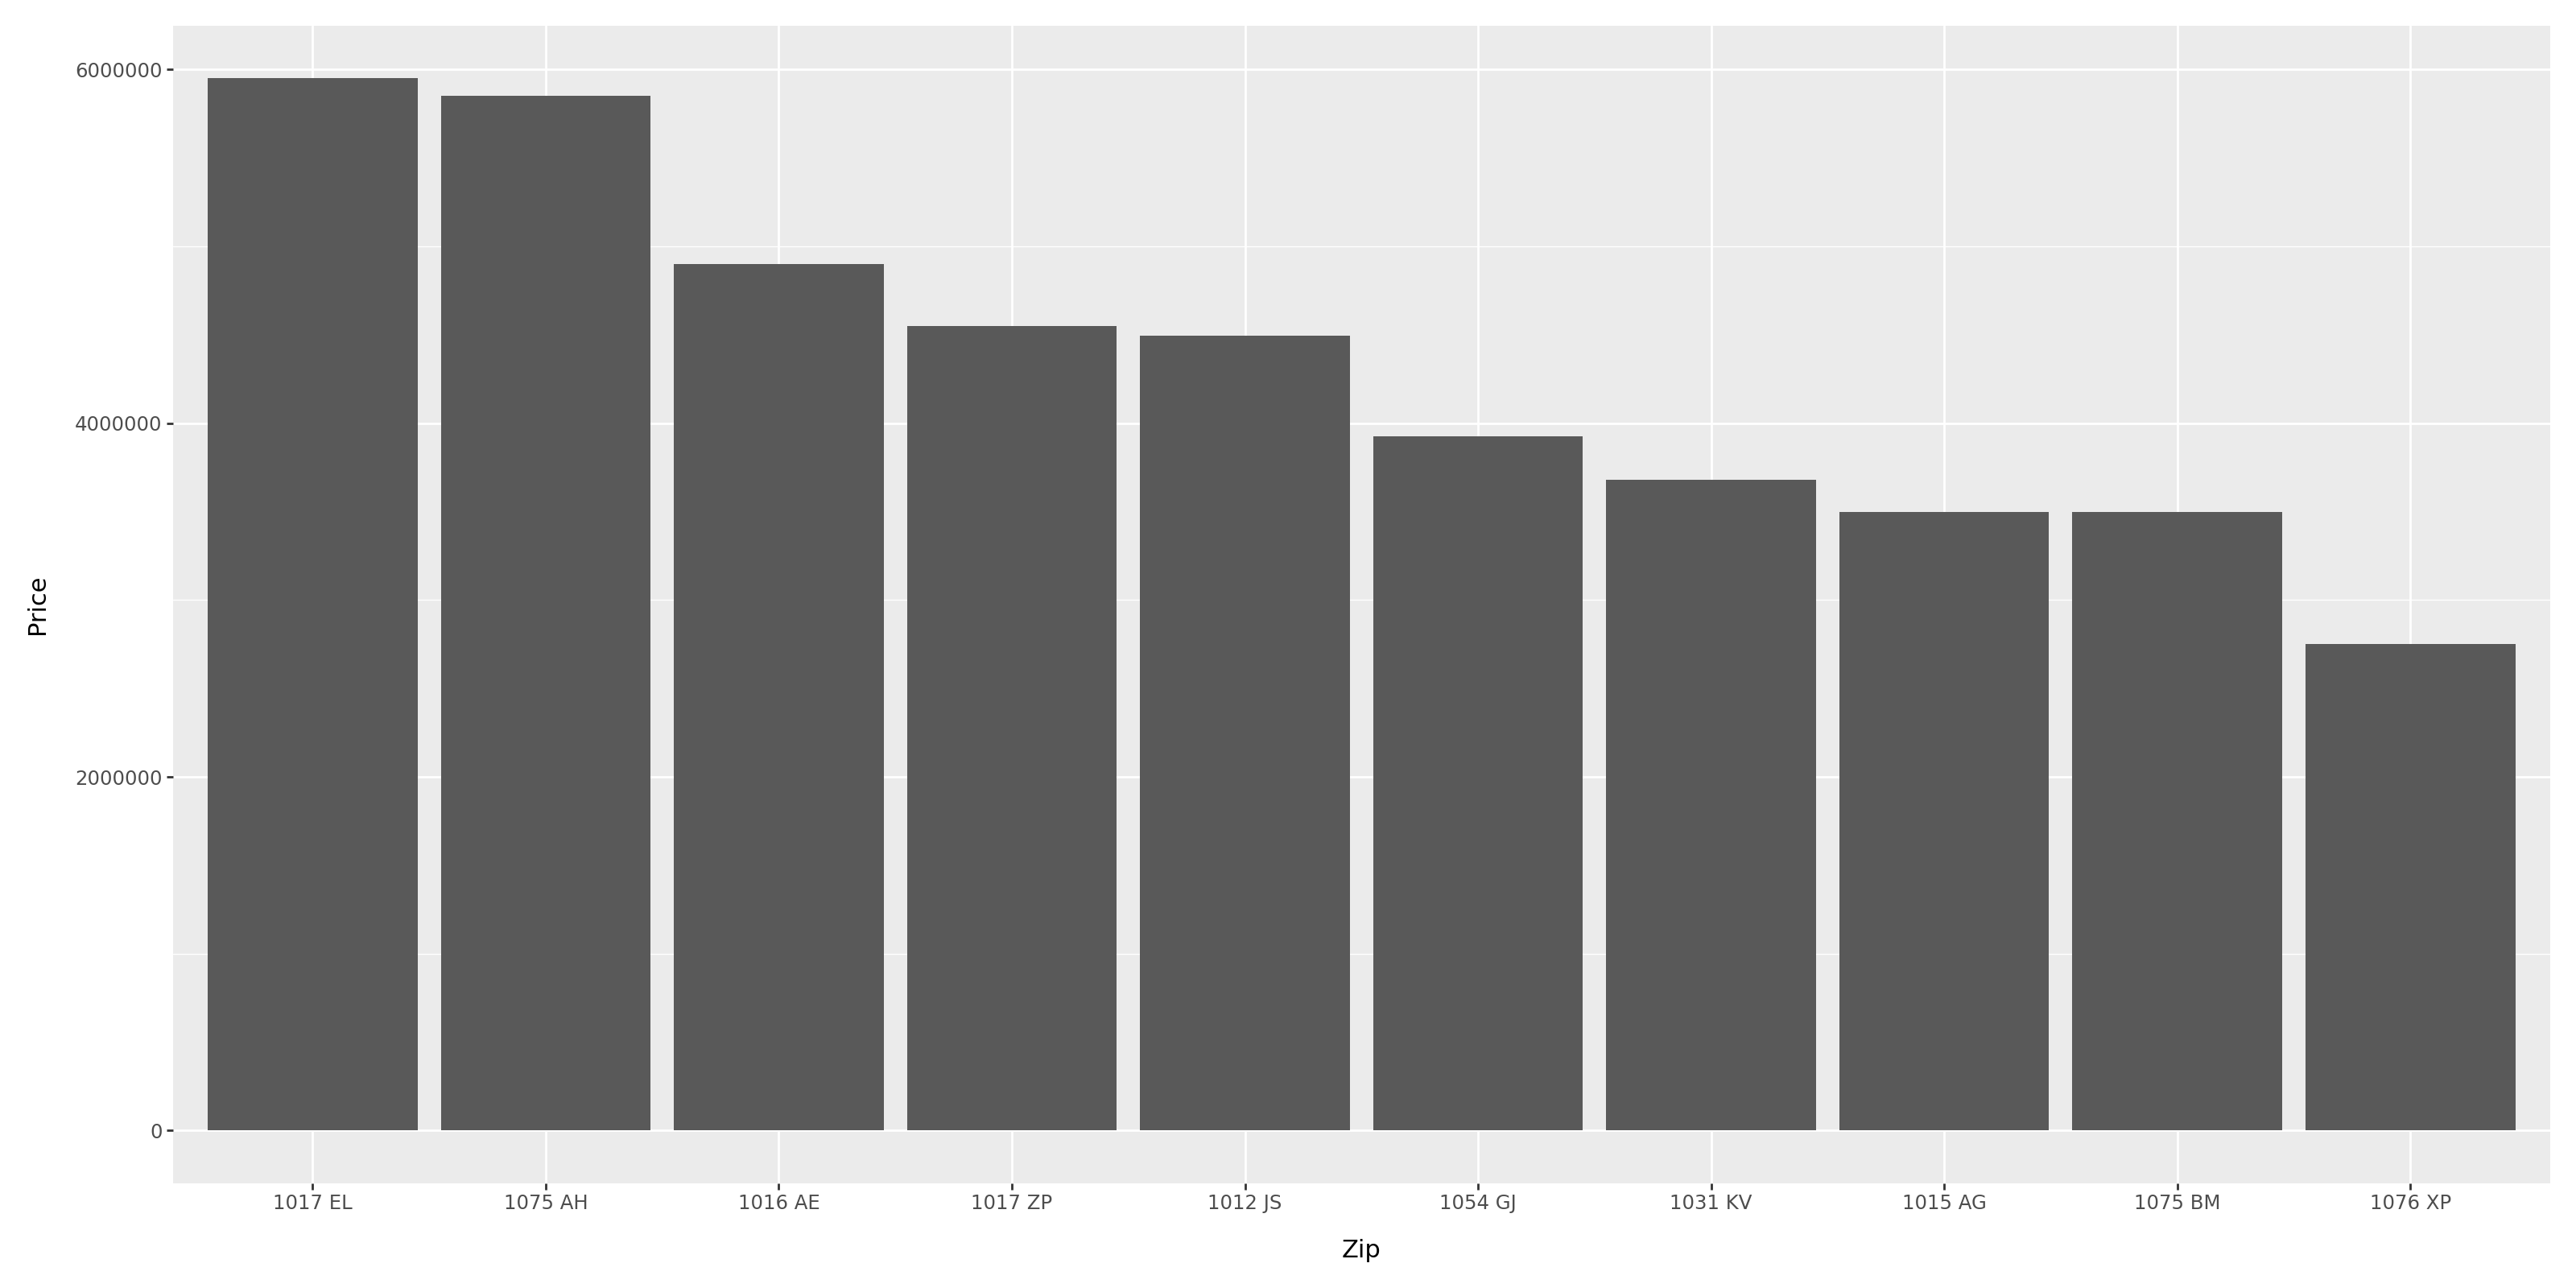

In [ ]:
chart_data = Selected_data[0:10]

ggplot(chart_data,aes(x='Zip',y = 'Price')) + geom_bar(stat = 'identity') \
+ scale_x_discrete(limits=chart_data['Zip'].tolist()) + theme(figure_size=(16, 8))

Uses the plotnine library, which is based on the grammar of graphics, to create a bar chart.
The resulting bar chart shows the house prices for the top 10 areas (by price). Each bar represents a zip code, and its height corresponds to the house price. Plotnine provides a different approach to building plots compared to Matplotlib and Seaborn, following the principles of the grammar of graphics.

## Adding Labels

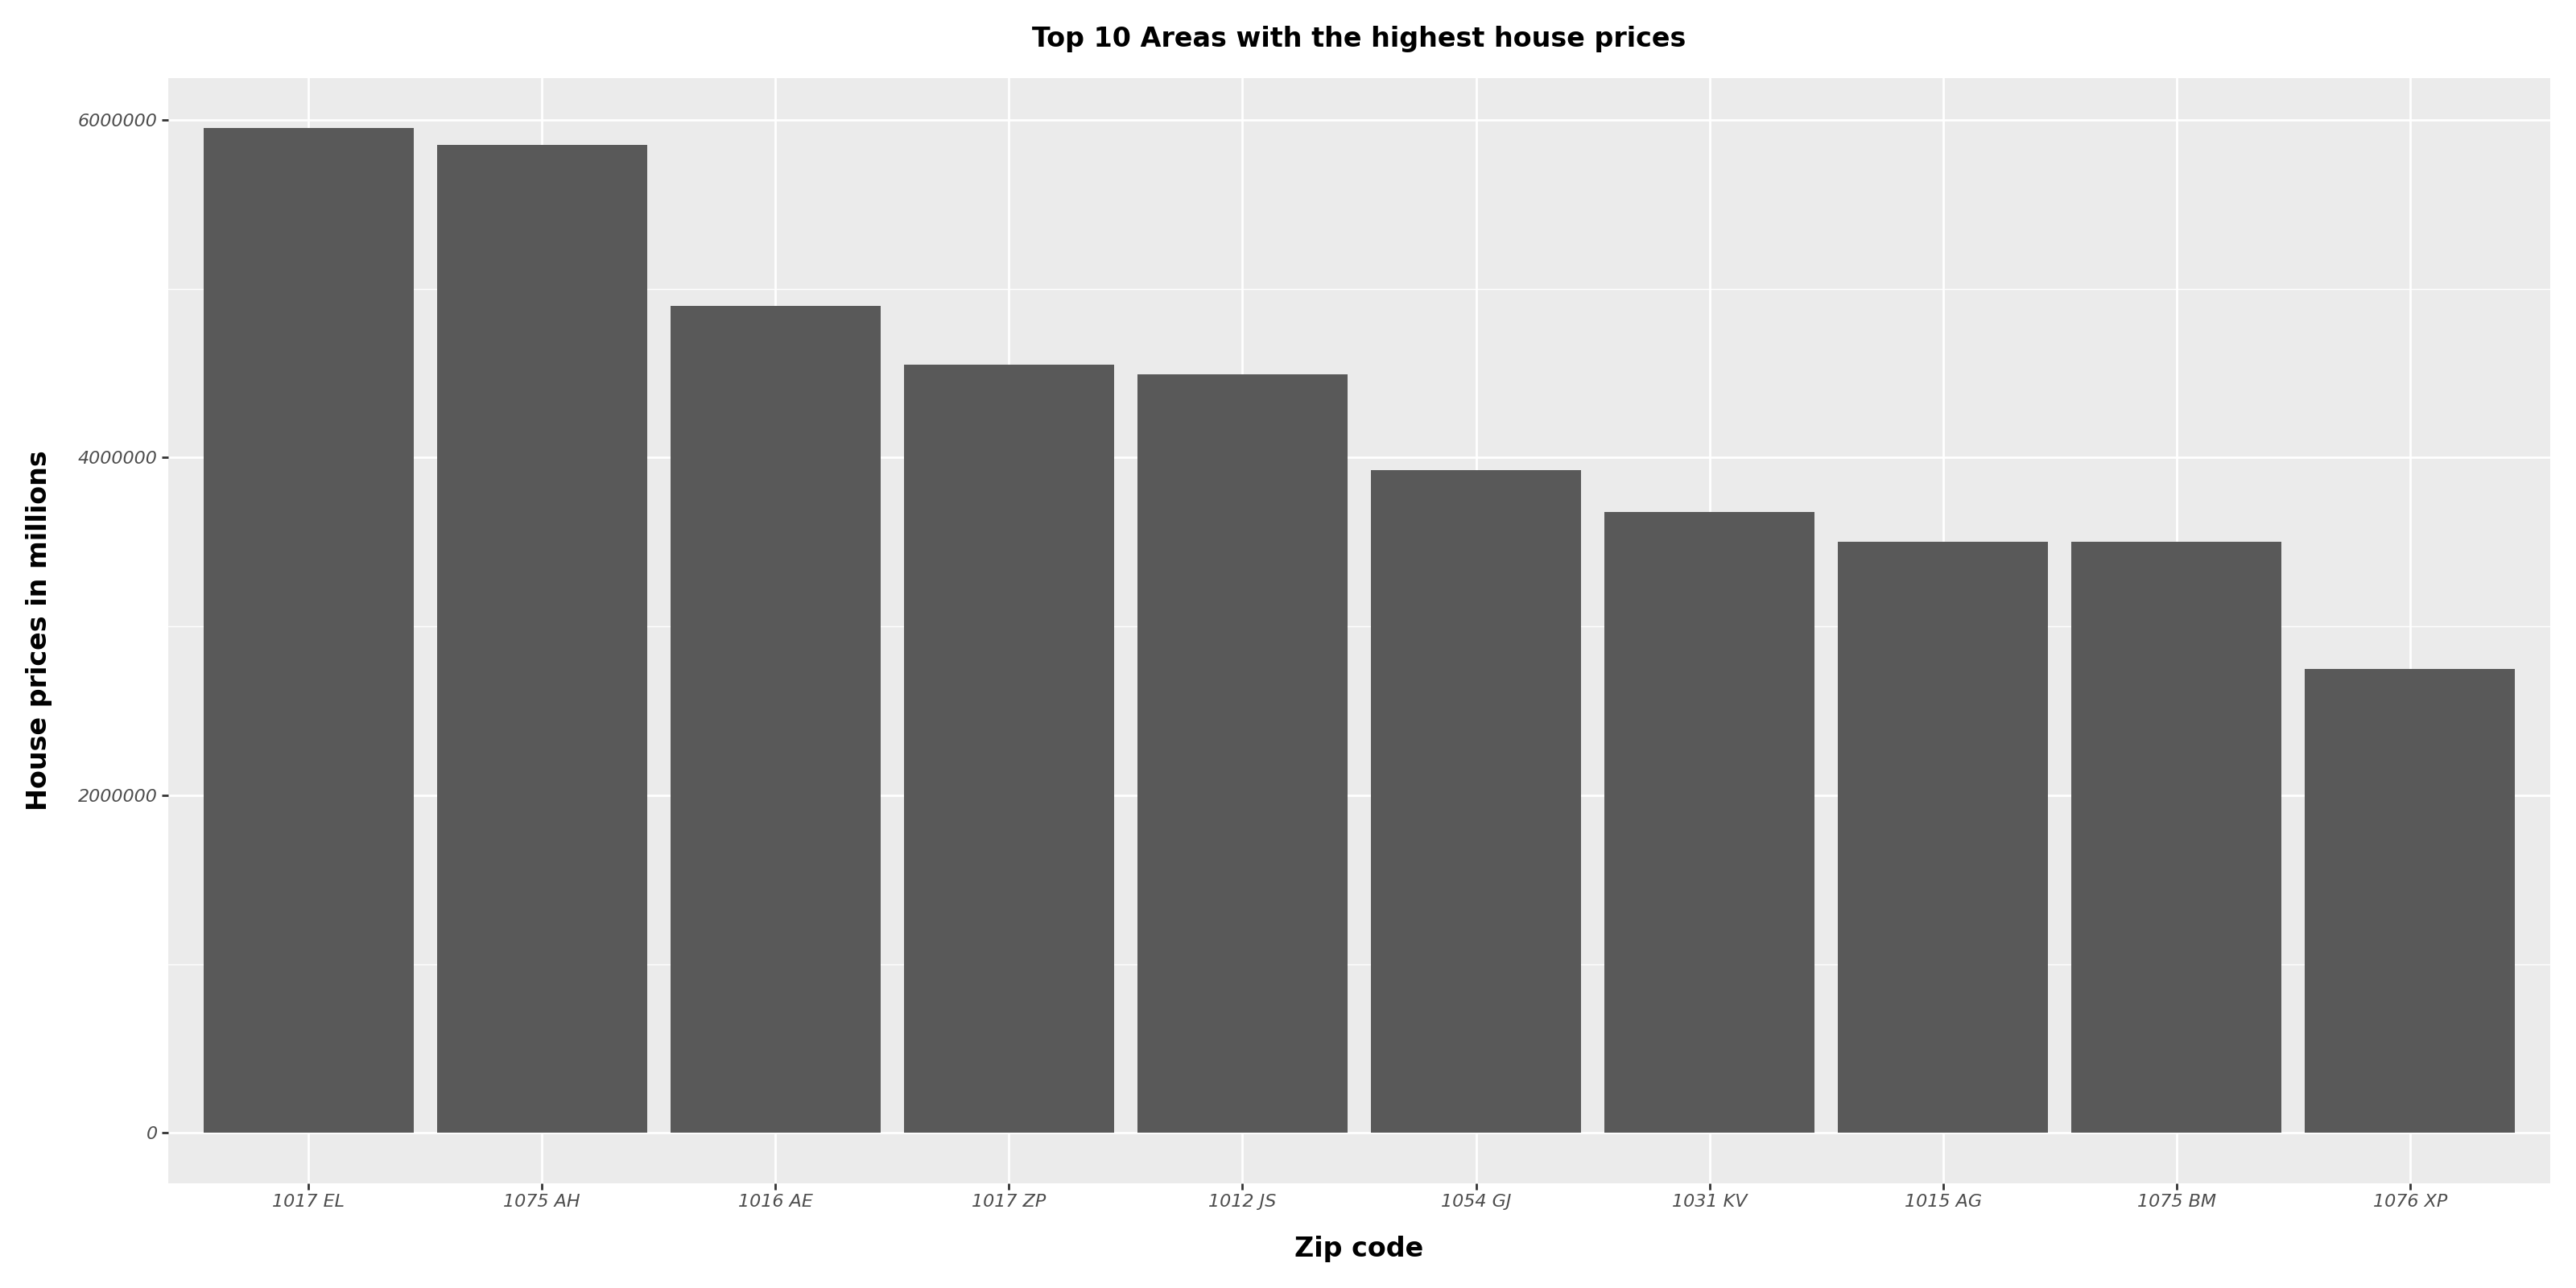

In [ ]:
ggplot(chart_data,aes(x='Zip',y = 'Price')) + geom_bar(stat = 'identity') \
+ scale_x_discrete(limits=chart_data['Zip'].tolist()) \
+ labs(y='House prices in millions', x='Zip code', title='Top 10 Areas with the highest house prices') \
+ theme(figure_size=(16, 8),
        axis_title=element_text(face='bold', size=12),
        axis_text=element_text(face='italic', size=8),
        plot_title=element_text(face='bold', size=12))

Just Added Title and Labels

## Plot a bar chart using Bokeh


Libraries

In [ ]:
from bokeh.plotting import figure, show
import bokeh.plotting as bk_plot
from bokeh.io import output_notebook
output_notebook()

Basic plot

 Uses the bokeh library to create an interactive bar chart.

In [ ]:
data = Selected_data[0:10]

fig = figure(x_range = data['Zip'],width = 700, height = 500)
fig.vbar(x= data['Zip'], top = data['Price'], width = 0.9)
show(fig)

 bar chart shows the house prices for the top 10 areas (by price). Each bar represents a zip code, and its height corresponds to the house price. Bokeh creates interactive visualizations that you can pan, zoom, and hover over to see data details.

Adding labels

In [ ]:
fig = figure(x_range = data['Zip'], width = 700, height = 500,
             title = 'Top 10 Areas with the highest house prices per sqm', x_axis_label = 'Zip code',
             y_axis_label = 'House prices per sqm')

fig.vbar(x= data['Zip'], top = data['PricePerSqft'], width = 0.9)

fig.xaxis.axis_label_text_font_size = "15pt"
fig.xaxis.major_label_text_font_size = "10pt"
fig.yaxis.axis_label_text_font_size = "15pt"
fig.yaxis.major_label_text_font_size = "10pt"
fig.title.text_font_size = '15pt'

show(fig)

Sub Plots

In [ ]:
p1 = figure(x_range = data['Zip'],width = 480, height = 400,
             title = 'Top 10 Areas with the highest house prices', x_axis_label = 'Zip code',
             y_axis_label = 'House prices in millions')

p1.vbar(x= data['Zip'], top = data['Price'], width = 0.9)

p2 = figure(x_range = data['Zip'],width = 480, height = 400,
             title = 'Top 10 Areas with the highest house prices per sqm', x_axis_label = 'Zip code',
             y_axis_label = 'House prices per sqm')

p2.vbar(x= data['Zip'], top = data['PricePerSqft'], width = 0.9)


gp = bk_plot.gridplot(children=[[p1, p2]])
bk_plot.show(gp)

Output shows two interactive bar charts side by side:

The chart on the left displays the top 10 highest house prices by zip code.
The chart on the right displays the top 10 highest house prices per square meter by zip code.
Similar to the Matplotlib and Seaborn subplots, this visualization allows you to compare the overall house price in an area with the price per unit of area, but with the added interactivity provided by Bokeh. You can pan, zoom, and hover over the bars to see the exact values.